** Include intro to project here**

** Include information about dataset here**

"This huge dataset contains all the songs in Spotify's Daily Top 200 charts in 35+1 (global) countries around the world for a period of over 3 years (2017-2020)"
Link: https://www.kaggle.com/pepepython/spotify-huge-database-daily-charts-over-3-years?select=Final+database.csv
Originally has [170633 rows x 151 columns]

In [172]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import squarify 

In [174]:
df = pd.read_csv('Final database.csv')

df

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170628,Taiwan,https://open.spotify.com/track/4v29A51TqtD2KFS...,31.20,smalltown,Luke Christopher,single,indie pop rap,152740,True,SmallTown,...,0,0,1,0,0,0,162,0.0,0.0,english speaking and nordic
170629,Taiwan,https://open.spotify.com/track/7InvbALrXpsz58J...,156.00,灰狼,G.E.M.,album,mandopop,1.22541e+06,False,摩天動物園,...,0,0,1,0,0,0,130,0.0,0.0,english speaking and nordic
170630,Taiwan,https://open.spotify.com/track/5rCNIuDc3VD7q6H...,90.40,預念患者,張赫宣,album,n-a,38,False,Freedom,...,0,0,1,0,0,0,133,0.0,0.0,english speaking and nordic
170631,Taiwan,https://open.spotify.com/track/0525Cll5exsrybt...,21.60,清晨巴士,Crowd Lu,album,chinese indie,149875,False,有吉他的流行歌曲,...,0,0,1,0,0,0,174,0.0,0.0,english speaking and nordic


Let's keep only the necessary columns for a visually cleaner table

In [175]:
df = df[['Country', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Album']]
df

,Country,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Album
0,Global,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
1,USA,8.00,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
2,Argentina,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
3,Belgium,849.60,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
4,Switzerland,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,Adan y Eva
...,...,...,...,...,...,...,...,...
170628,Taiwan,31.20,smalltown,Luke Christopher,single,indie pop rap,152740,SmallTown
170629,Taiwan,156.00,灰狼,G.E.M.,album,mandopop,1.22541e+06,摩天動物園
170630,Taiwan,90.40,預念患者,張赫宣,album,n-a,38,Freedom
170631,Taiwan,21.60,清晨巴士,Crowd Lu,album,chinese indie,149875,有吉他的流行歌曲


Some basic preliminary stats on the dataset: Out of 170633 songs we have 47045 unique songs, 25524 unique artists, 34696 unique albums, 1120 unique genres and 34 unique countries

In [176]:
print(len(pd.unique(df['Title'])))

print(len(pd.unique(df['Artist'])))

print(len(pd.unique(df['Album'])))

print(len(pd.unique(df['Genre'])))

print(len(pd.unique(df['Country'])))

print(pd.unique(df['Country']))

47045
25524
34696
1120
35
['Global' 'USA' 'Argentina' 'Belgium' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Germany' 'Ecuador' 'Spain' 'Italy' 'Mexico' 'Peru'
 'Portugal' 'Taiwan' 'UK' 'Austria' 'Australia' 'Canada' 'Finland'
 'France' 'Indonesia' 'Ireland' 'Malaysia' 'Netherlands' 'Norway'
 'New Zealand' 'Philippines' 'Poland' 'Sweden' 'Singapore' 'Turkey'
 'Brazil' 'Denmark']


Let's try making some graphs on single measures of the data.

First, a bar chart of the distribution of songs among countries. We make an auxiliary dataframe to store the number of songs per country, and plot it in decreasing order

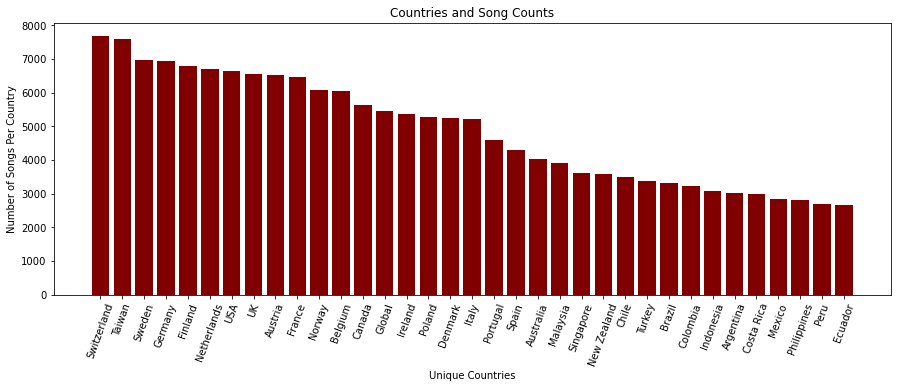

In [177]:
song_count = df.groupby(['Country']).size()

countries = pd.DataFrame({'Country':song_count.index, 'Song Count':song_count.values})

countries = countries.sort_values(by=['Song Count'], ascending=False)

plt.figure(figsize=(15,5))
plt.bar(countries['Country'], countries['Song Count'], color ='maroon', linewidth='0.9')
 
plt.xlabel("Unique Countries")
plt.ylabel("Number of Songs Per Country")
plt.title("Countries and Song Counts")
plt.xticks(rotation = 70)
plt.show()

H

In [178]:
genre_count = df.groupby(['Genre']).size()

genre = pd.DataFrame({'Genre':genre_count.index, 'Count':genre_count.values})

genre = genre.sort_values(by=['Count'], ascending=False)

plt.figure(figsize=(150,150)) 

squarify.plot(sizes=genre['Count'], label=genre['Genre'], alpha=.8 )
plt.axis('off')
plt.show()

'''
We're def not keeping it like this LOL but i thought the treemap was cool 
and maybe we can combine the smaller categories into "other" and/or cut out the lower
percent of the data just to visually represent it

'''
